[*********************100%%**********************]  1 of 1 completed
09:42:07 - cmdstanpy - INFO - Chain [1] start processing
09:42:10 - cmdstanpy - INFO - Chain [1] done processing


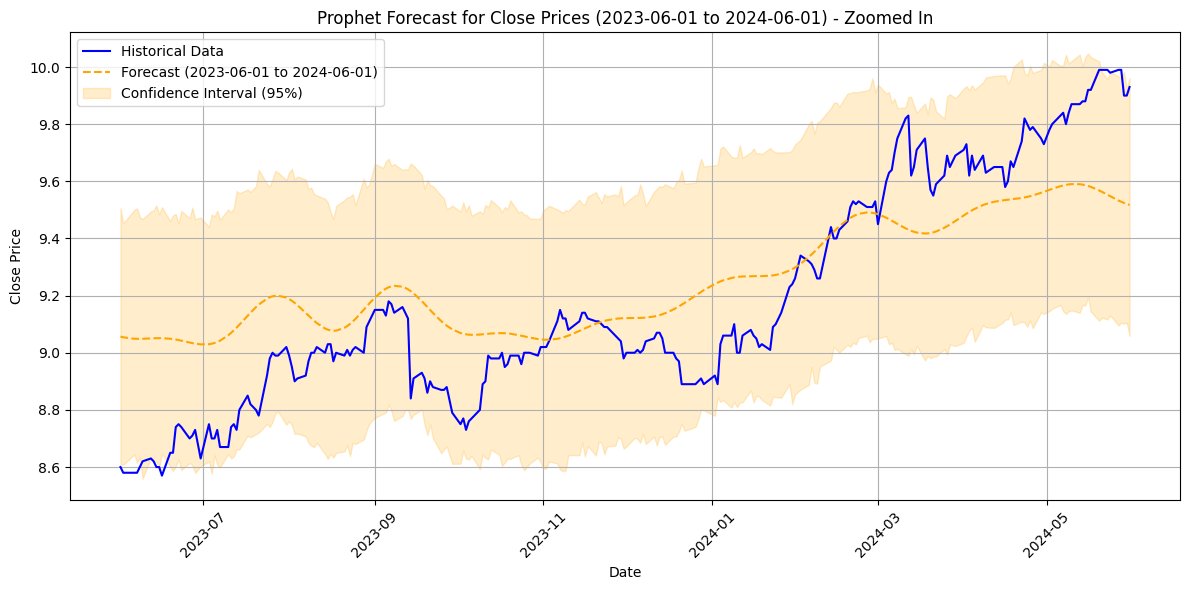

In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf

# ---------------------
# Step 1: Load Data
# ---------------------

# Fetch data from Yahoo Finance for 1155.KL (2004-07-01 to 2024-08-01)
ticker = "1155.KL"
data = yf.download(ticker, start="2004-07-01", end="2024-08-01")

# Prepare the dataset for Prophet
# Prophet expects two columns: 'ds' for the date and 'y' for the target variable
prophet_data = data[['Close']].reset_index()
prophet_data.columns = ['ds', 'y']  # Rename columns to match Prophet requirements

# ---------------------
# Step 2: Train Prophet Model
# ---------------------

# Initialize the Prophet model
model = Prophet(
    seasonality_mode='multiplicative',  # Multiplicative seasonality for financial data
    yearly_seasonality=True,           # Enable yearly seasonality
    weekly_seasonality=False,          # Weekly seasonality is less relevant for stocks
    daily_seasonality=False            # Daily seasonality is not applicable
)

# Fit the model
model.fit(prophet_data)

# ---------------------
# Step 3: Forecasting
# ---------------------

# Define the forecasting duration
future_dates = model.make_future_dataframe(periods=365)  # Extend for 1 year ahead
forecast = model.predict(future_dates)

# ---------------------
# Step 4: Filter Forecast for Specific Period
# ---------------------

# Extract the forecasted range from 2023-06-01 to 2024-06-01
forecast_filtered = forecast[(forecast['ds'] >= "2023-06-01") & (forecast['ds'] <= "2024-06-01")]

# ---------------------
# Step 5: Filtered Visualization
# ---------------------

# Filter historical data for the specified range (2023-06-01 to 2024-06-01)
historical_filtered = prophet_data[(prophet_data['ds'] >= "2023-06-01") & (prophet_data['ds'] <= "2024-06-01")]

# Filter forecasted data for the same range
forecast_filtered = forecast[(forecast['ds'] >= "2023-06-01") & (forecast['ds'] <= "2024-06-01")]

# Plot the actual data and forecasted values
plt.figure(figsize=(12, 6))

# Plot filtered historical data
plt.plot(historical_filtered['ds'], historical_filtered['y'], label="Historical Data", color="blue", linestyle="-")

# Plot forecast for the specified range
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label="Forecast (2023-06-01 to 2024-06-01)", linestyle="--", color="orange")

# Add confidence intervals to the forecast
plt.fill_between(
    forecast_filtered['ds'],
    forecast_filtered['yhat_lower'],
    forecast_filtered['yhat_upper'],
    color="orange",
    alpha=0.2,
    label="Confidence Interval (95%)"
)

# Add title and labels
plt.title("Prophet Forecast for Close Prices (2023-06-01 to 2024-06-01) - Zoomed In")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# ---------------------
# Step 6: Save Forecast
# ---------------------
forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("prophet_forecast.csv", index=False)
